In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

%matplotlib inline 

In [ ]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

In [ ]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(train_df.shape, test_df.shape)

(60000, 785) (10000, 785)


**Data Preprocessing**

In [ ]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

We need to rescale our images by dividing it to the 255.

In [ ]:
X_train = train_data[:,1:]/255

y_train = train_data[:,0]

X_test= test_data[:,1:]/255

y_test=test_data[:,0]

By train_test_split function we're splitting the training set for train and validation part.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2,random_state = 17)

**Visualization part of Fashion MNIST**

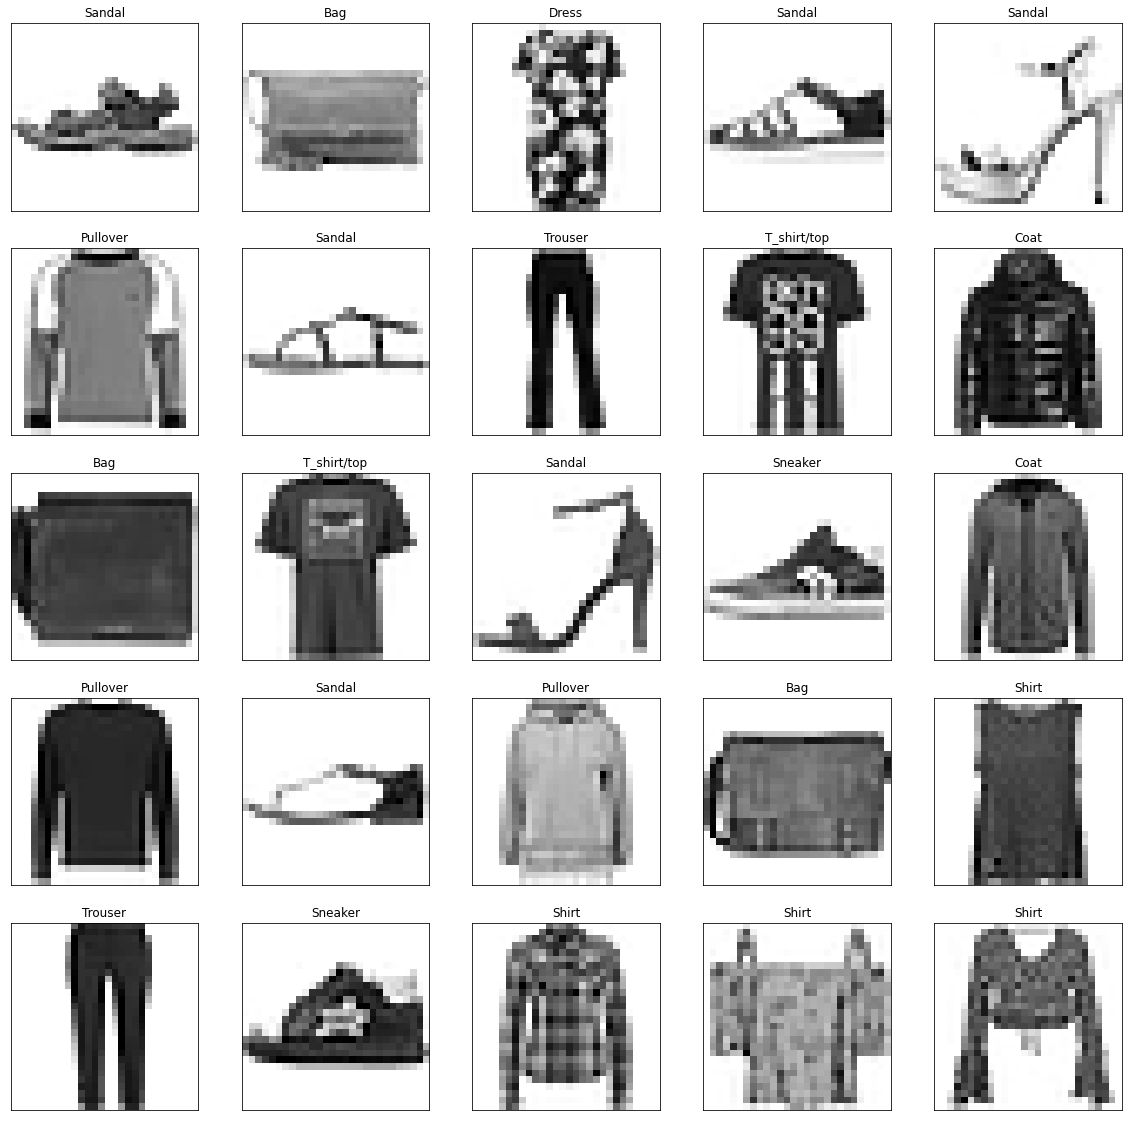

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(20, 20))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In the following steps we will reshape the columns from (784) to (28,28,1).Also we need to transform class vector to binary class matrix. 

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_val = keras.utils.to_categorical(y_val, 10)


In [ ]:
X_train.shape

(48000, 28, 28, 1)

In [ ]:
y_train.shape

(48000, 10)

**Now, as the main part, we will build the CNN model.**

In [ ]:
num_classes = 10

In [ ]:
pre_model = Sequential()
pre_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
pre_model.add(MaxPooling2D((2, 2)))
pre_model.add(Conv2D(64, (3, 3), activation='relu'))
pre_model.add(MaxPooling2D((2, 2)))
pre_model.add(Conv2D(128, (3, 3), activation='relu'))

pre_model.add(Flatten())
pre_model.add(Dense(128, activation='relu'))
pre_model.add(Dense(num_classes, activation='softmax'))

pre_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
batch_size = 128
num_classes = 10
epochs = 30

To complete one epoch 48000/128 = 375 iterations will be made.

In [ ]:
pre_history = pre_model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/30
375/375 [==============================] - 31s 81ms/step - loss: 0.5386 - accuracy: 0.8028 - val_loss: 0.3696 - val_accuracy: 0.8673
Epoch 2/30
375/375 [==============================] - 30s 80ms/step - loss: 0.3417 - accuracy: 0.8760 - val_loss: 0.3214 - val_accuracy: 0.8836
Epoch 3/30
375/375 [==============================] - 31s 82ms/step - loss: 0.2907 - accuracy: 0.8939 - val_loss: 0.2784 - val_accuracy: 0.9011
Epoch 4/30
375/375 [==============================] - 29s 78ms/step - loss: 0.2642 - accuracy: 0.9032 - val_loss: 0.2800 - val_accuracy: 0.9007
Epoch 5/30
375/375 [==============================] - 30s 79ms/step - loss: 0.2336 - accuracy: 0.9146 - val_loss: 0.2625 - val_accuracy: 0.9038
Epoch 6/30
375/375 [==============================] - 31s 83ms/step - loss: 0.2120 - accuracy: 0.9220 - val_loss: 0.2446 - val_accuracy: 0.9118
Epoch 7/30
375/375 [==============================] - 31s 82ms/step - loss: 0.1905 - accuracy: 0.9291 - val_loss: 0.2481 - val_accuracy:

In [ ]:
pre_score = pre_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', pre_score[0])
print('Test accuracy:', pre_score[1])

Test loss: 0.5062195062637329
Test accuracy: 0.9124000072479248


Text(0.5, 1.0, 'Train - Accuracy')

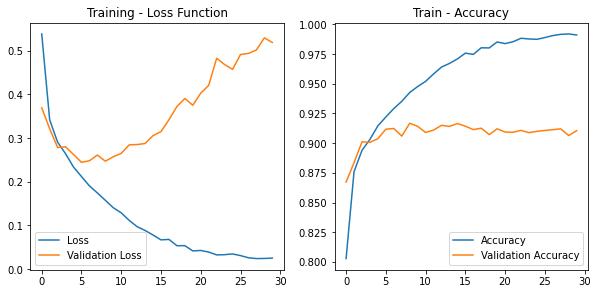

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(pre_history.history['loss'], label='Loss')
plt.plot(pre_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(pre_history.history['accuracy'], label='Accuracy')
plt.plot(pre_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

Here we can see that both validation accuracy and validation loss does not perform very well. It can be said that our CNN model is overfitted.The most popular solution to this problem in DNNs is adding Dropout layers.The main aim of Dropout is to ignore certain portion of neurons during the training phase. 

It is recommended to start with a small dropout value of 0.2–0.5. Too much of Dropout layers and value itself will negatively affect the model in terms of underfitting while too less will lead to overfitting.

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)        

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/30
375/375 [==============================] - 38s 101ms/step - loss: 0.7506 - accuracy: 0.7212 - val_loss: 0.4696 - val_accuracy: 0.8332
Epoch 2/30
375/375 [==============================] - 38s 100ms/step - loss: 0.4652 - accuracy: 0.8266 - val_loss: 0.3768 - val_accuracy: 0.8633
Epoch 3/30
375/375 [==============================] - 33s 88ms/step - loss: 0.4050 - accuracy: 0.8513 - val_loss: 0.3342 - val_accuracy: 0.8760
Epoch 4/30
375/375 [==============================] - 33s 88ms/step - loss: 0.3636 - accuracy: 0.8673 - val_loss: 0.3038 - val_accuracy: 0.8885
Epoch 5/30
375/375 [==============================] - 33s 89ms/step - loss: 0.3339 - accuracy: 0.8771 - val_loss: 0.2853 - val_accuracy: 0.8958
Epoch 6/30
375/375 [==============================] - 34s 92ms/step - loss: 0.3172 - accuracy: 0.8827 - val_loss: 0.2662 - val_accuracy: 0.9019
Epoch 7/30
375/375 [==============================] - 35s 92ms/step - loss: 0.2986 - accuracy: 0.8903 - val_loss: 0.2666 - val_accurac

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20388315618038177
Test accuracy: 0.9290000200271606


Text(0.5, 1.0, 'Train - Accuracy')

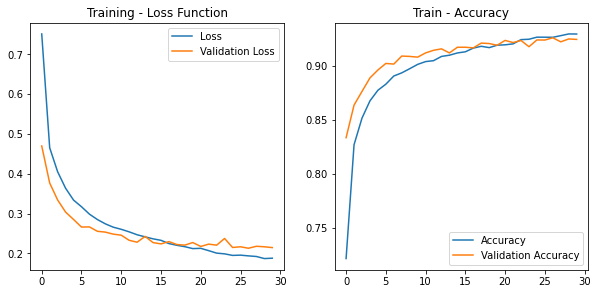

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

After adding dropout layers agains overfitting problem, we can see how both validation accuracy and validation loss show no signs of overfitting/underfitting.Test accuracy and test loss show better results for a model with droput layers:

Model without dropout layers:
*  Test loss: 0.5062195062637329
*  Test accuracy: 0.9124000072479248

Model with dropout layers:
* Test loss: 0.20388315618038177
* Test accuracy: 0.9290000200271606

**Classification Report**

In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1)
y_true = test_df.iloc[:, 0].values

correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.89      0.88      0.88      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.86      0.92      0.89      1000
      Class 3 (Dress) :       0.92      0.96      0.94      1000
       Class 4 (Coat) :       0.92      0.85      0.89      1000
     Class 5 (Sandal) :       0.99      0.98      0.99      1000
      Class 6 (Shirt) :       0.80      0.77      0.79      1000
    Class 7 (Sneaker) :       0.96      0.97      0.97      1000
        Class 8 (Bag) :       0.97      0.99      0.98      1000
 Class 9 (Ankle Boot) :       0.97      0.97      0.97      1000

               accuracy                           0.93     10000
              macro avg       0.93      0.93      0.93     10000
           weighted avg       0.93      0.93      0.93     10000



Here we can see that our model is underperforming for class 6(Shirt) in both precision and recall. 
In case of class 2(Pullover),precision parameter is low, while for class 4(Coat) recall parameter is low.


**Now, we will visualize the correct/incorrect predictions of our trained model.**

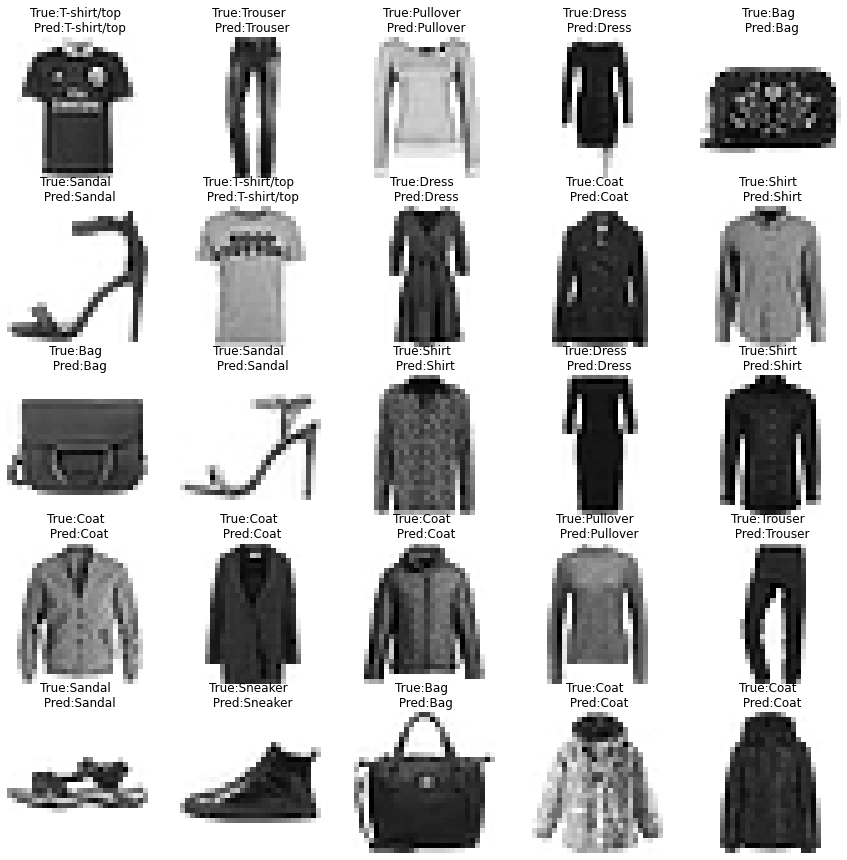

In [ ]:
def visualize_images(data_i,cmap=plt.cm.binary):
    f, ax = plt.subplots(5,5, figsize=(15,15))

    for i, j in enumerate(data_i[:25]):
        ax[i//5, i%5].imshow(X_test[j].reshape(28,28), cmap=cmap)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("True:{} \n Pred:{}".format(labels[y_true[j]],labels[predicted_classes[j]]))
    plt.show()    
    
visualize_images(correct)

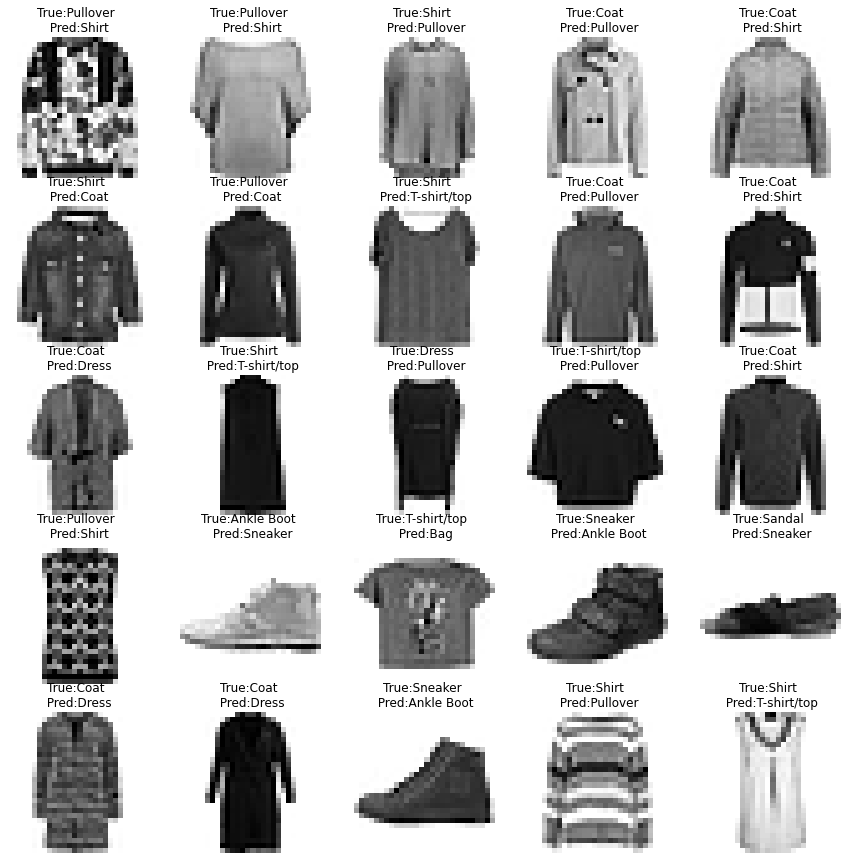

In [ ]:
visualize_images(incorrect)

Analyzing the incorrect predictions, it can be said that diversity of the similar patterns present on multiple classes negatively effect the performance of the CNN model. Class 2 (Pullover), Class 4 (Coat) and Class 6 (Shirt) has similar patterns such as long sleeves, buttons, and simillar form. This can be considered as a reason for comparatively low results(precision/recall) in predicting mentioned classes.

**Conclusion**

At the beginnig of training our **pre_model**  for 30 epochs, we have gained an accuracy = 0.912 for the test prediction. Visualization of validation accuracy and validation loss helped us to understood that our CNN model is overfitting.
To solve this problem, we used Dropout layers. With our new model(with dropout layers), we solved the problem of overfitting an increased the accuracy = 0.929 for the test prediction.


**Benchmark - Accuracy**

https://www.kaggle.com/pavansanagapati/a-simple-cnn-model-beginner-guide

*  Test Loss : 0.2606
*  Test Accuracy : 0.9089

Our CNN model Results:

* Test loss: 0.20388315618038177
* Test Accuracy: 0.9290000200271606